<a href="https://colab.research.google.com/github/larissakischenah/codes/blob/master/modelo01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base = pd.read_csv('/content/drive/MyDrive/KaggleSpotify/data.csv')

In [ ]:
base.describe()
base.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


<ipython-input-50-75b6d71585f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = base.corr()


<Axes: >

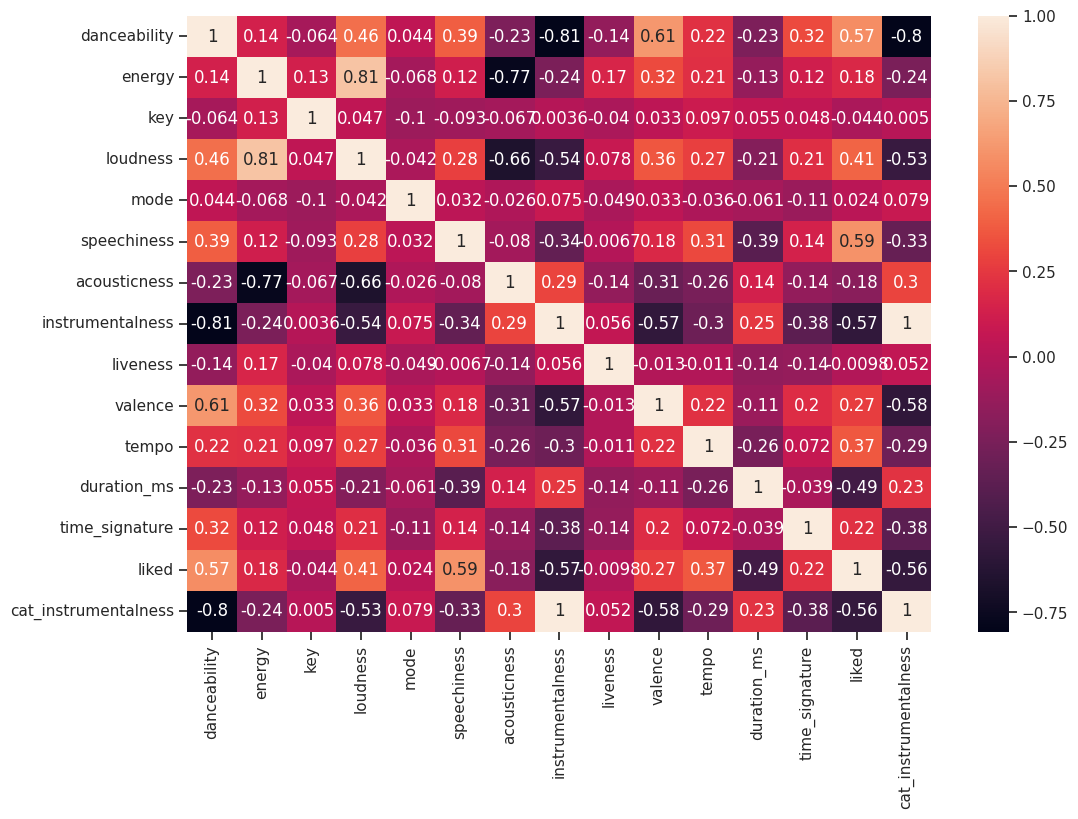

In [ ]:
correlacao = base.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlacao, annot=True)

**Tem valores zerados?  Porquê estão zerados?**

Sim, mas são partes de uma classificação do dataset, portanto uma categoria.


**Existem valores com números nulos? **

Não, a Base já está normalizada.

Existem valores em branco?
Não, já está Correta.

Qual é o perfil de música do dataset? (qual tipo de música que ele mais gosta?)


<Axes: xlabel='instrumentalness', ylabel='Count'>

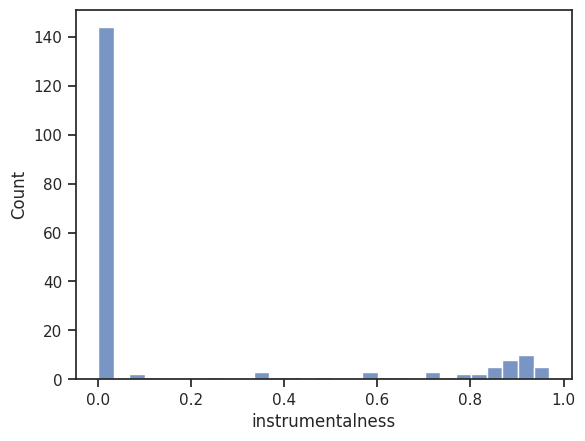

In [ ]:
#Qual preferência da instrumentalização da musical do usuário?
#Gráficos de Histograma ou curva de probabilidade
sns.histplot(base, x='instrumentalness')

Pelo gráfico conseguimos analisar que 140 músicas não são instrumentais (ele gosta de músicas com voz)

Agora vamos fazer a  divisão, abaixo de 25%, significa que a música tem a probabilidade altissima de ter vocal em toda a música 

In [ ]:

def classifica_instrumentalness(value_float):
    value = float(value_float)
    if value >= 0.75:
        return 4 ## A probabilidade de possuir vocal é baixissimas
    elif value >= 0.50:
        return 3 ## A probabilidade de possuir vocal é baixa
    elif value >= 0.25:
        return 2 ## A probabilidade de possuir vocal é alta
    else:
      return 1 ## A probabilidade de possuir vocal é altissima 

def classifica_instrumentalness_txt(value):
    if value == 1:
        return 'Altissima'
    elif value == 2:
        return 'Alta'
    elif value == 3:
        return 'Baixa'
    else:
      return 'Baixíssimas'


base['cat_instrumentalness'] = base['instrumentalness'].map(classifica_instrumentalness)
base['cat_instrumentalness_txt'] = base['cat_instrumentalness'].map(classifica_instrumentalness_txt)


In [ ]:
## Verifica se os valores estão corretos;
base['cat_instrumentalness'].unique()
base['cat_instrumentalness_txt'].unique()


array(['Altissima', 'Baixíssimas', 'Baixa', 'Alta'], dtype=object)

[Text(0.5, 0, 'Probabilidade de Possuir Vocal'),
 Text(0, 0.5, 'Musicas'),
 Text(0.5, 1.0, 'Contador Musicas x Prob. de possuir Vocal')]

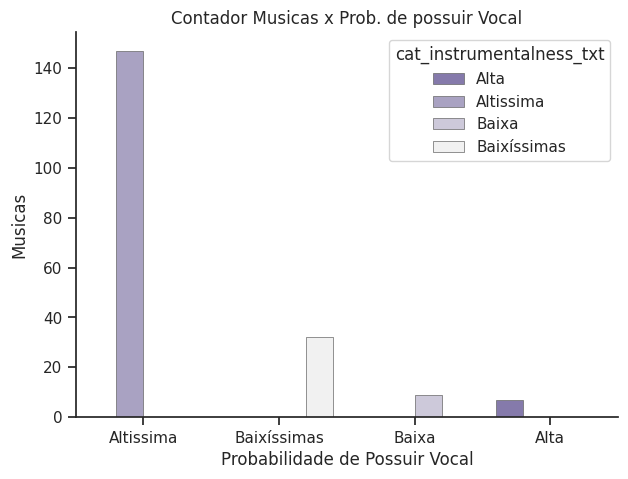

In [ ]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

ranking = base.groupby('cat_instrumentalness_txt').size().sort_values().index[::-1]

sns.countplot(
    data=base,
    x="cat_instrumentalness_txt", 
    hue_order=base.sort_values('cat_instrumentalness_txt')['cat_instrumentalness_txt'].unique(),
    order=ranking,
    hue="cat_instrumentalness_txt",
    palette="light:m_r",
    edgecolor=".4",
    linewidth=0.5
)

ax.set(xlabel ="Probabilidade de Possuir Vocal", ylabel = "Musicas", title ='Contador Musicas x Prob. de possuir Vocal')

In [ ]:
base.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked,cat_instrumentalness
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821,0.512821,1.620513
std,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332,0.501122,1.148549
min,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.000000,1.000000
25%,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000,0.000000,1.000000
50%,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000,1.000000,1.000000
75%,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000,1.000000,1.000000
max,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,1.000000,4.000000
